In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score


In [2]:
data = pd.read_csv(r"D:\fcds-office\archive\adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Data Exploration

In [3]:
# Print the shape of data
print(data.shape)
# Print the columns of data
print(data.columns)
print(data.info())

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.

In [4]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [5]:
data.describe().T
#some statistic info about numerical columns

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [7]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


Data Cleaning and Handling Missing Values

In [8]:
data_missing= (data== '?').sum()
data_missing

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
data['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [11]:
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
#replace the values with mode: most frequent
data[data == '?'] = np.nan #not a number
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)
#or manual replacement
#data['workclass'] = data['workclass'].replace('?', 'Private')
#data['occupation'] = data['occupation'].replace('?', 'Prof-specialty')
#data['native.country'] = data['native.country'].replace('?', 'United-States')

In [13]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [14]:
data.duplicated().sum()

24

In [15]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [16]:
data.shape

(32537, 15)

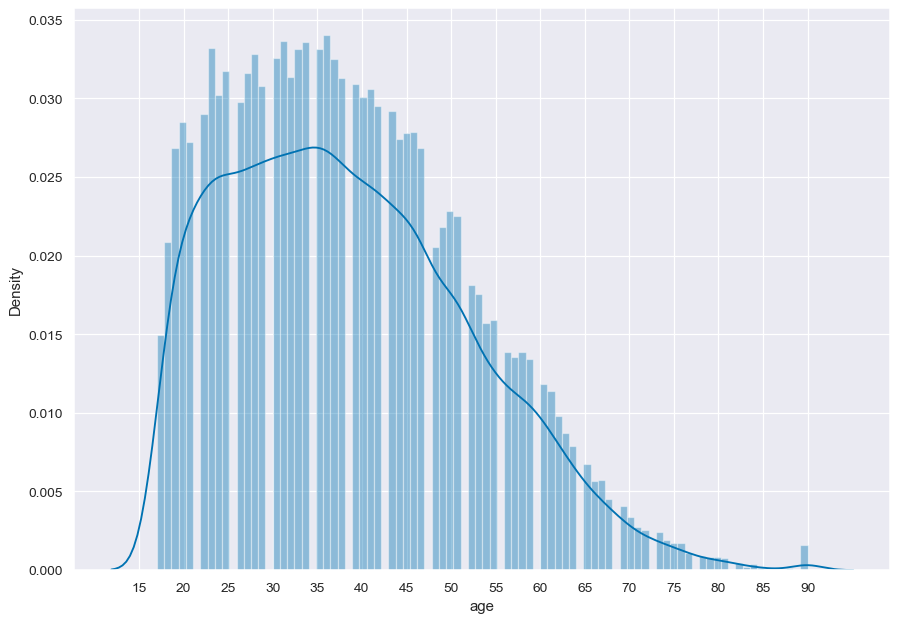

In [17]:
#age is skewed
sns.set(rc={'figure.figsize':(11.7,8.27),'figure.dpi':90})
sns.distplot(x=data["age"],kde=True,bins=90,color="#0072B2")
plt.xticks(np.arange(15,95,5))
plt.xlabel("age")
plt.show()

Bining

In [18]:
data['age_Groups'] = pd.cut(data['age'],[16, 30, 40, 50, 60, 100], 
        labels= ['17-30 years old','31-40 years old','41-50 years old','51-61 years old','61+ years old'])
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_Groups
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,61+ years old
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,61+ years old
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,61+ years old
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,51-61 years old
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-50 years old


In [19]:
data['age_Groups'].unique()

['61+ years old', '51-61 years old', '41-50 years old', '31-40 years old', '17-30 years old']
Categories (5, object): ['17-30 years old' < '31-40 years old' < '41-50 years old' < '51-61 years old' < '61+ years old']

Data Visualization

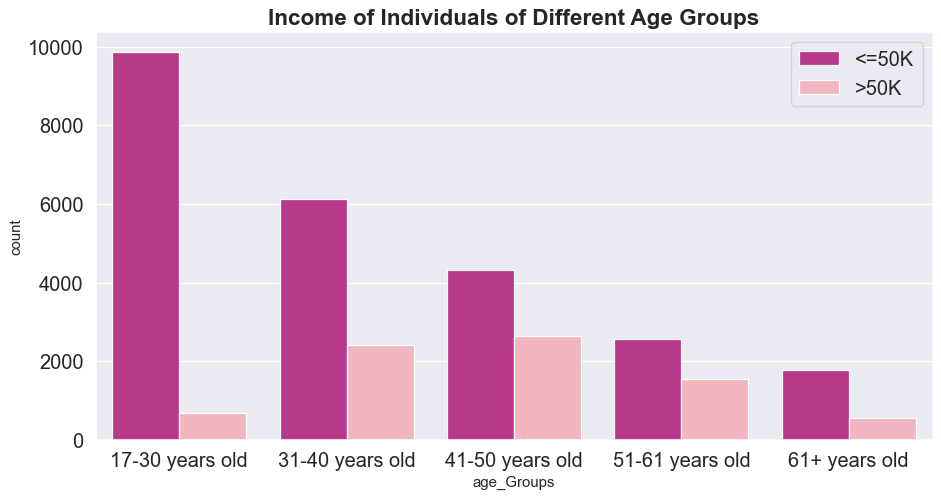

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data['age_Groups'], hue = data['income'], palette='RdPu_r')
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

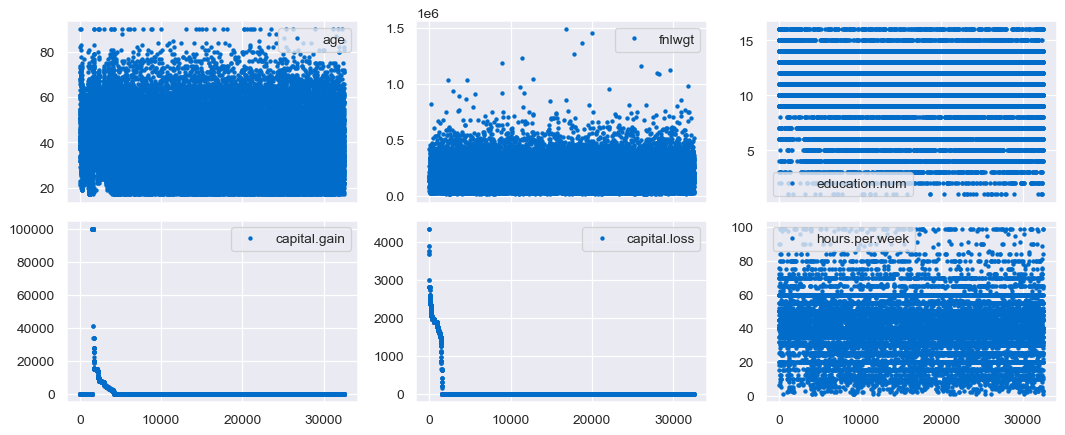

In [21]:
#Value Behaviour
# For all Numerical columnn for all rows 
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#016CC9')
plt.tight_layout()

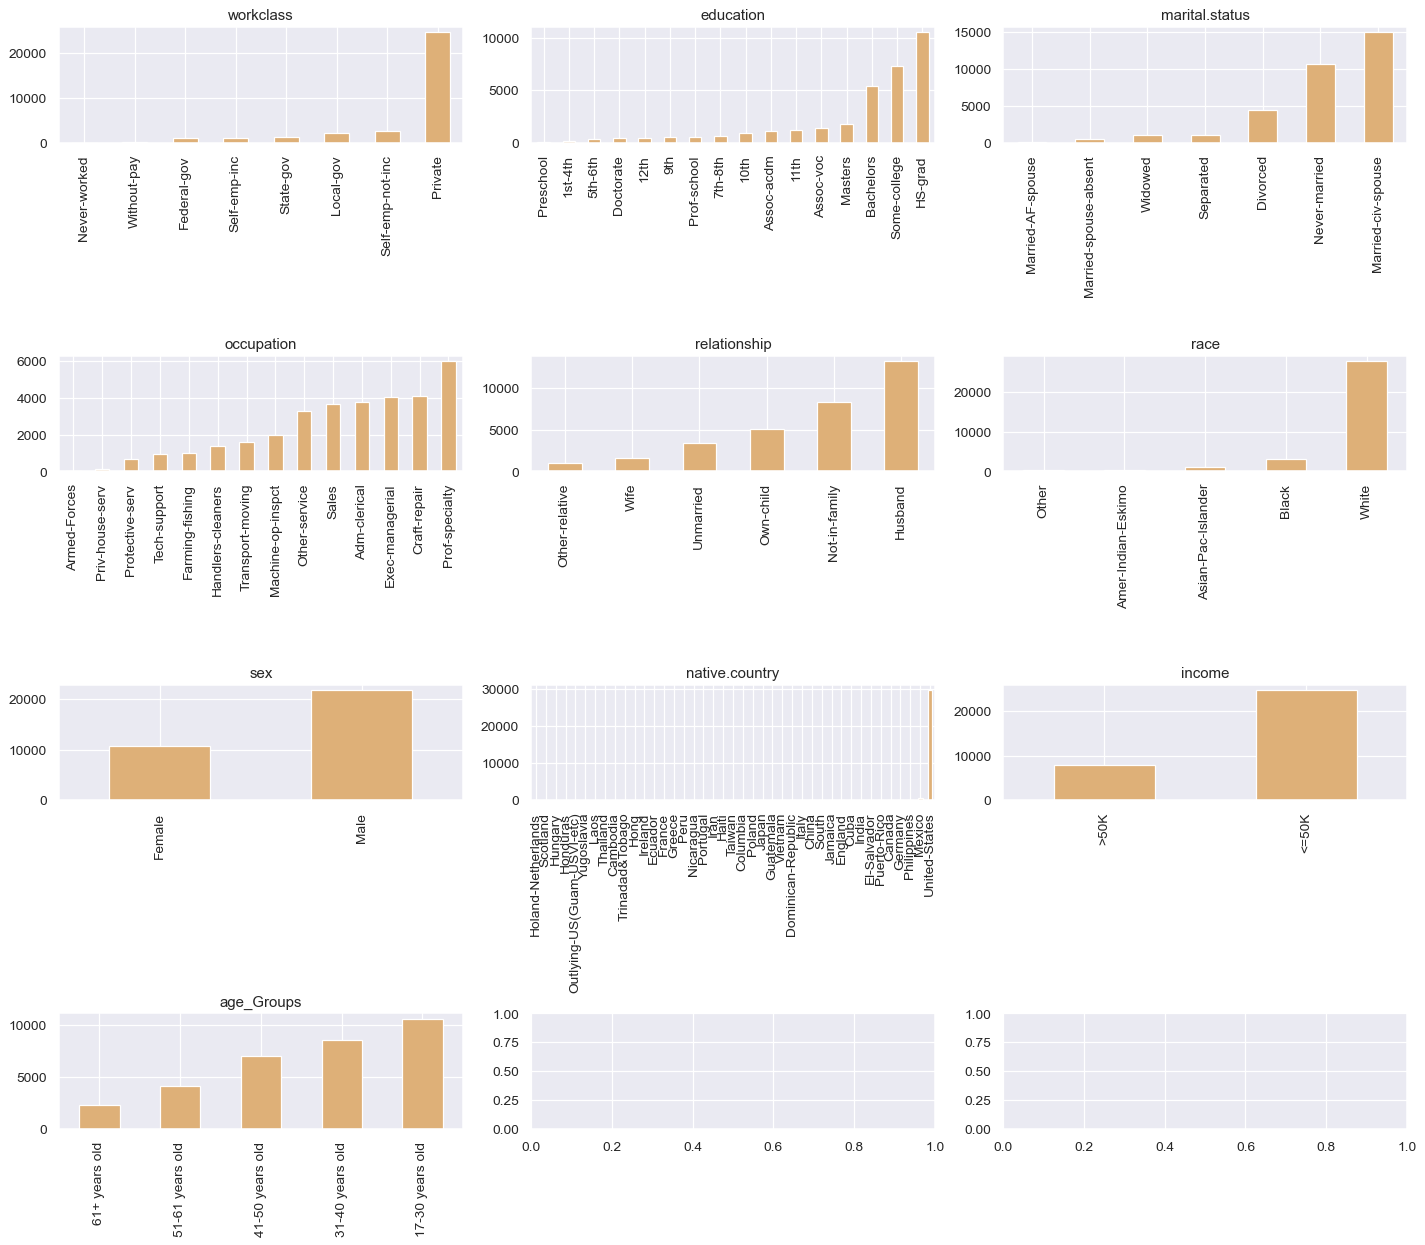

In [22]:
# Categorical Columns
fields=data.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    data[fields[i-1]].value_counts().sort_values().plot.bar(color='#DEB078')  
    plt.xticks(rotation=90)
    plt.title(fields[i-1])
    
plt.tight_layout()
plt.show()

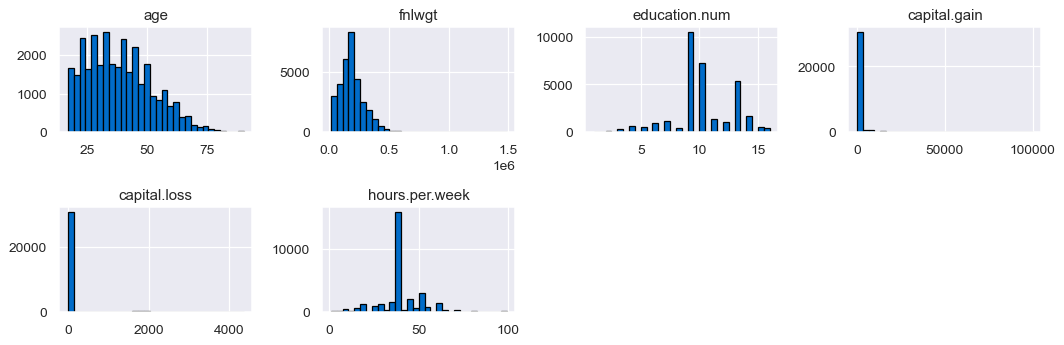

In [23]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,4)
layout_val=(-1, 4)
data.hist(bins=30, figsize=figsize_val, layout=layout_val, edgecolor="black",color='#016CC9')
plt.tight_layout();

In [24]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))
target=data[['income']].value_counts(normalize=True).round(decimals=3)*100

#target.rename(index={1:'Default',0:'Paid'},inplace=True)

pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Income: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

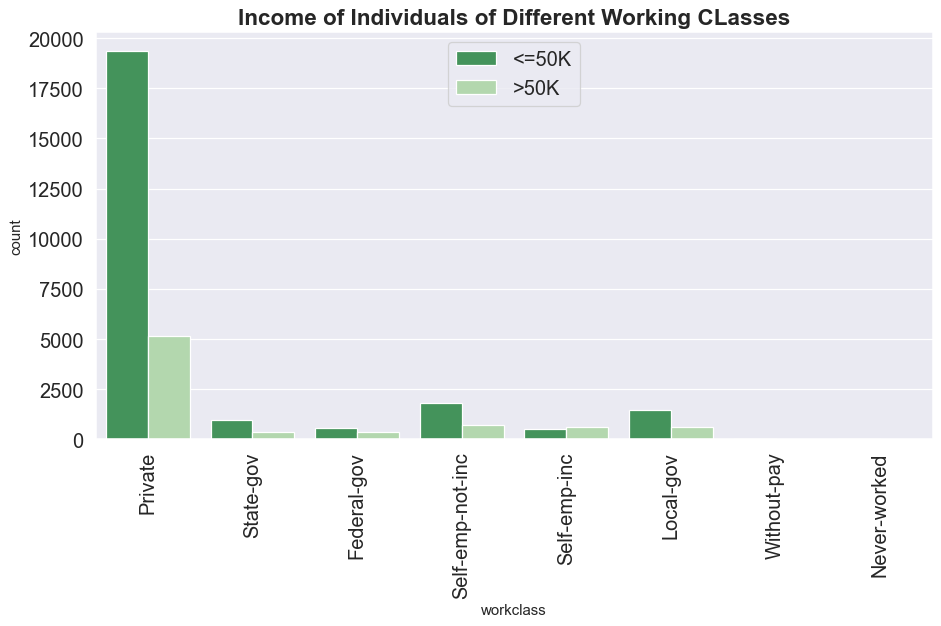

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data['workclass'], hue = data['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

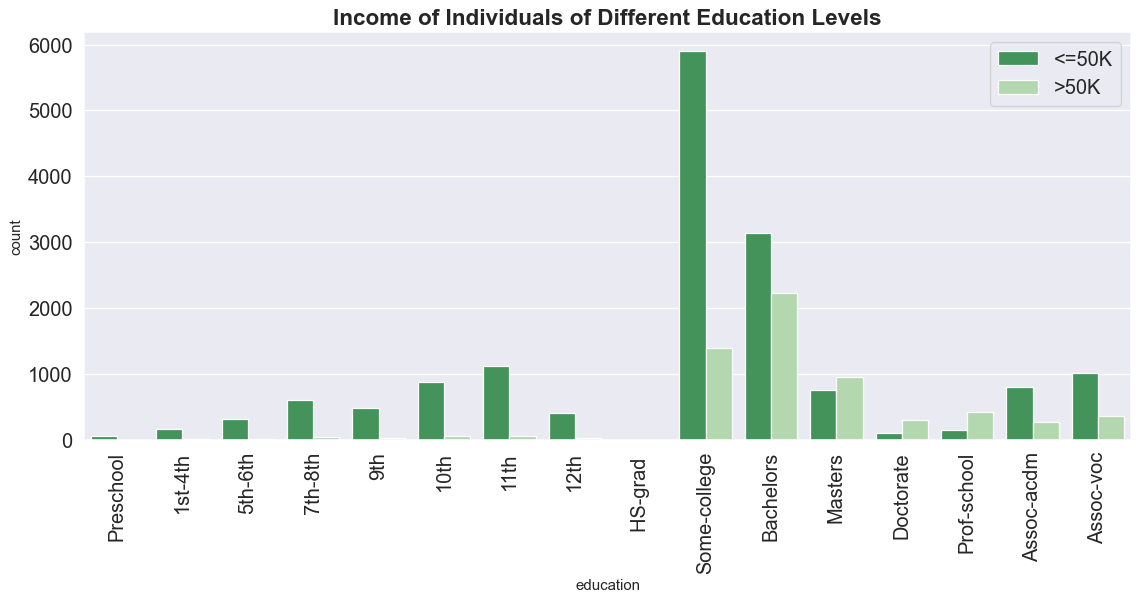

In [26]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(data['education'], hue = data['income'], palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

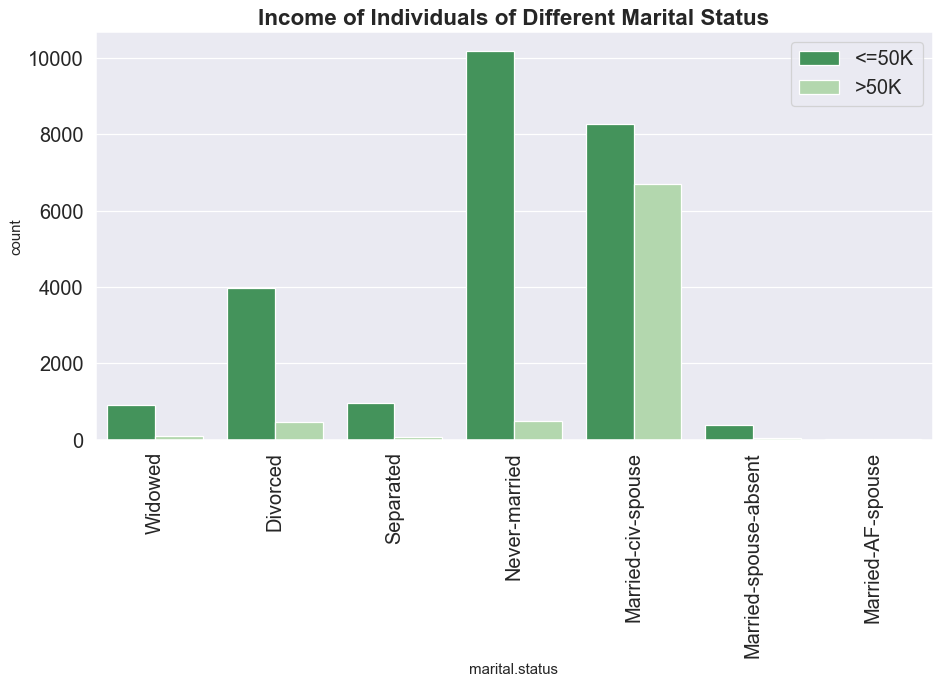

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data['marital.status'], hue = data['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

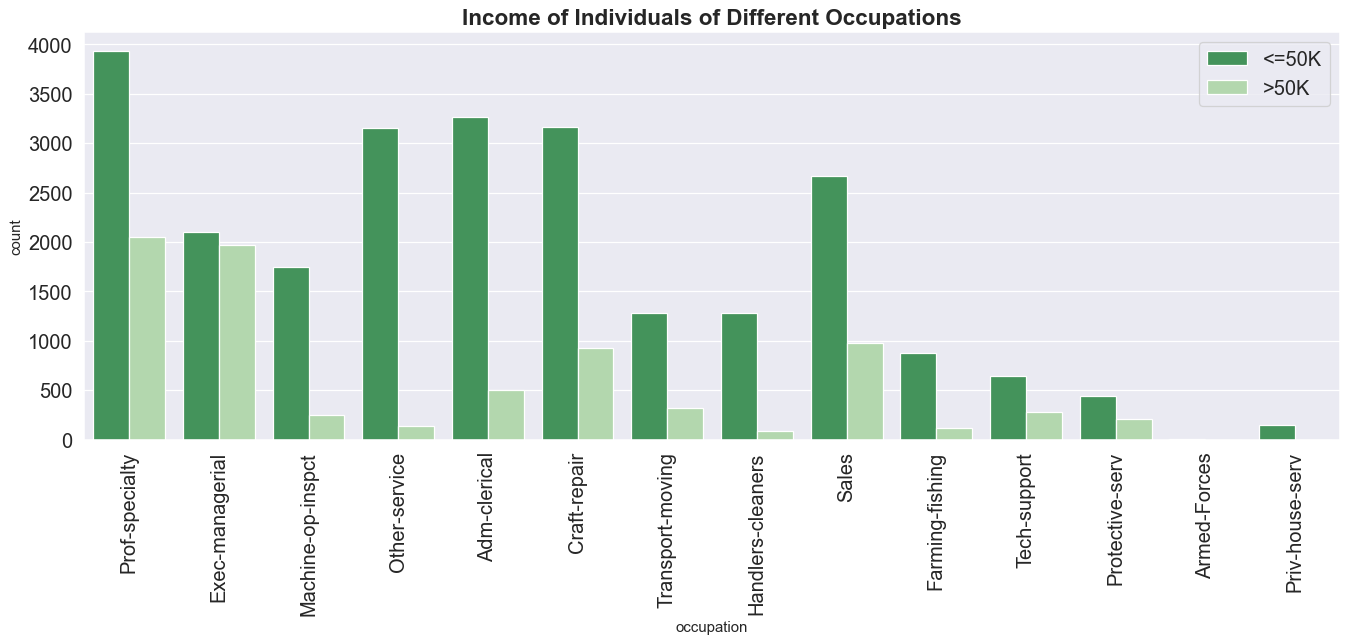

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(data['occupation'], hue = data['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

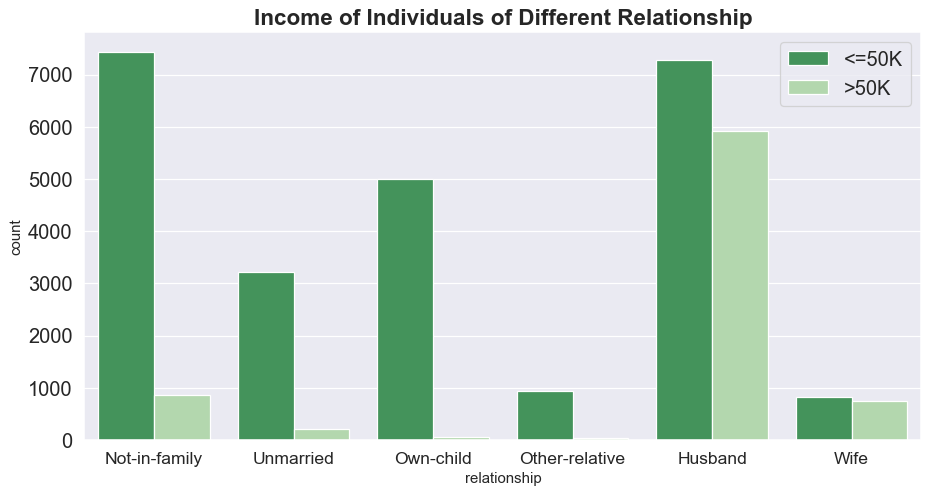

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data['relationship'], hue = data['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

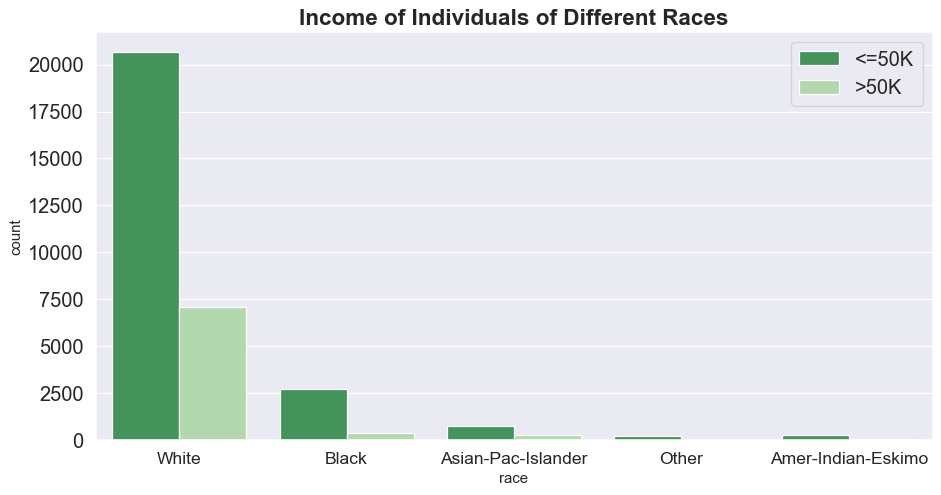

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data['race'], hue = data['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

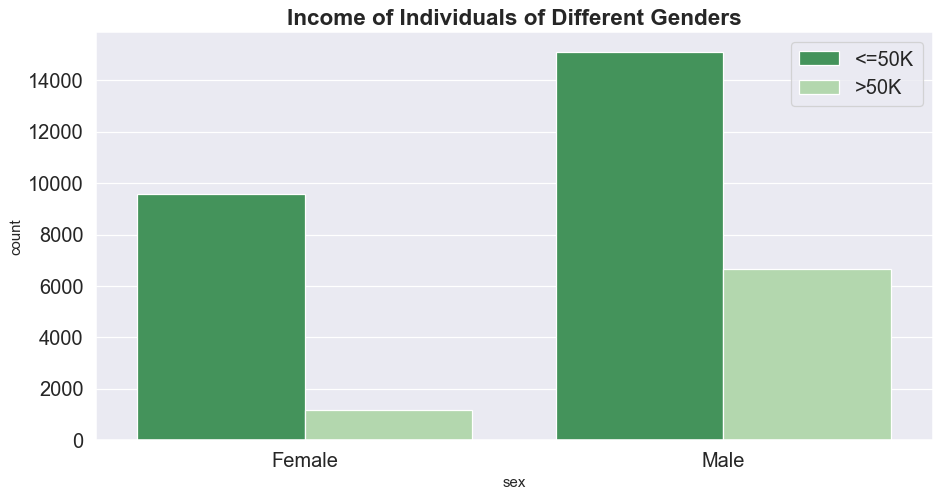

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data['sex'], hue = data['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

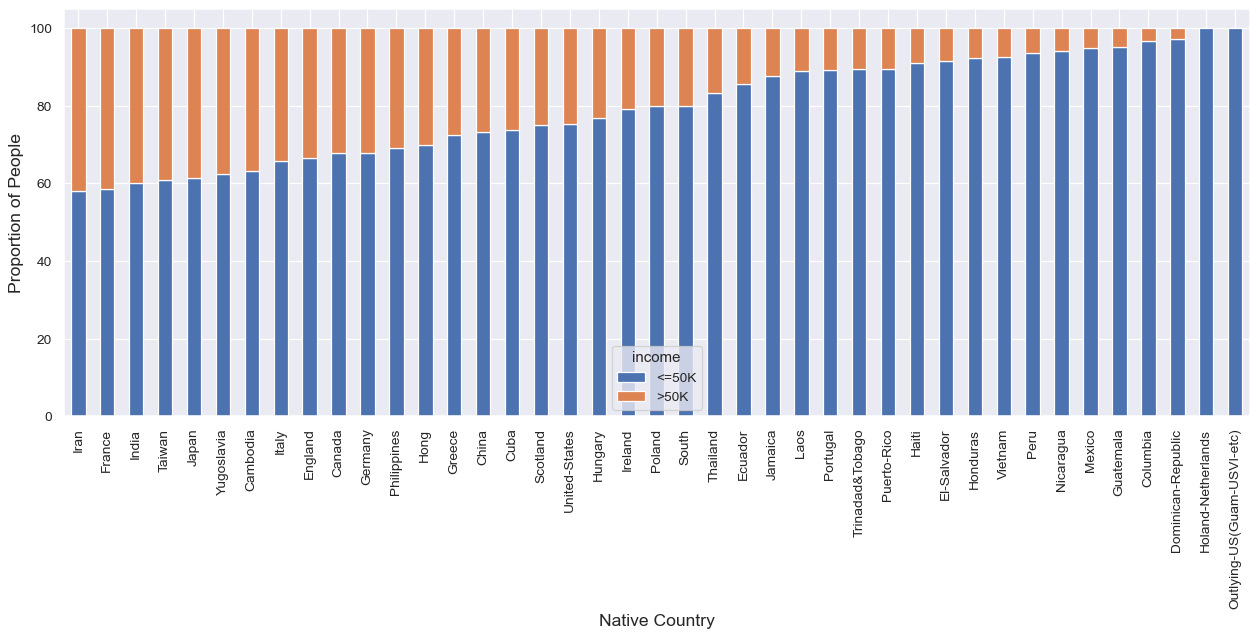

In [32]:
table_country = pd.crosstab(data['native.country'], data['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

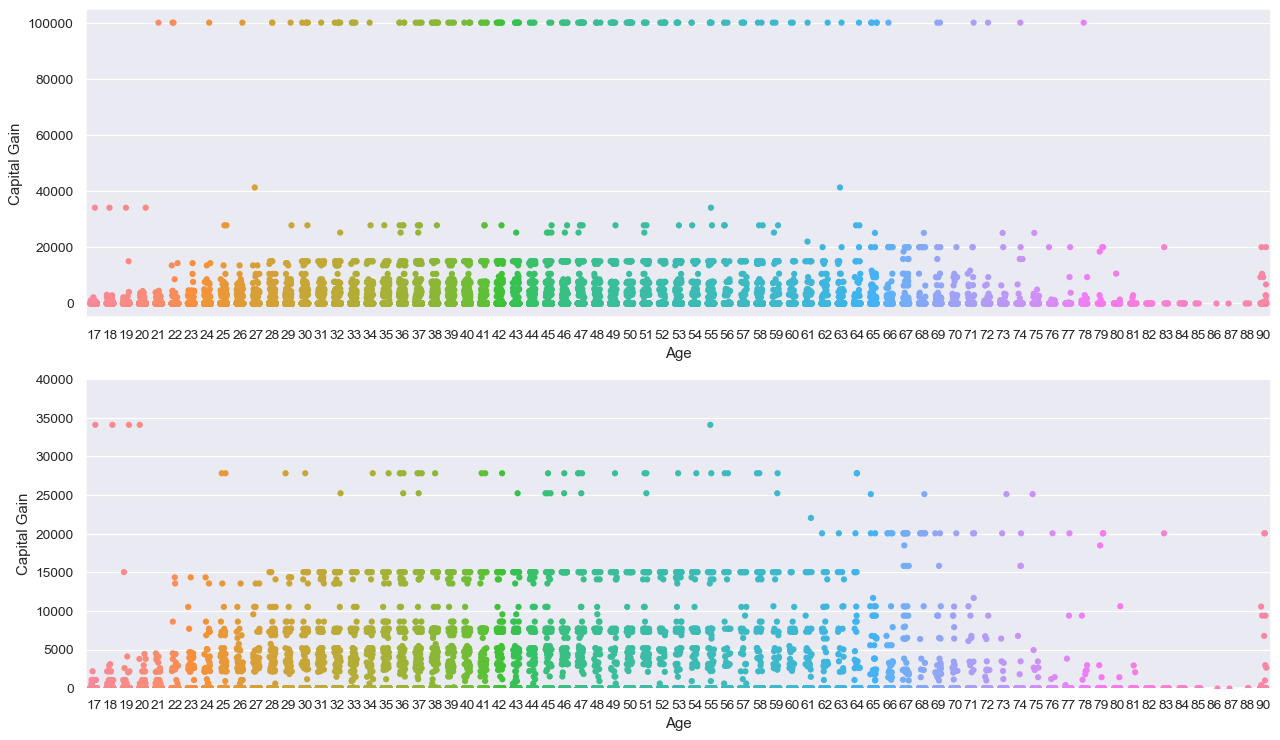

In [33]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital.gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital.gain', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

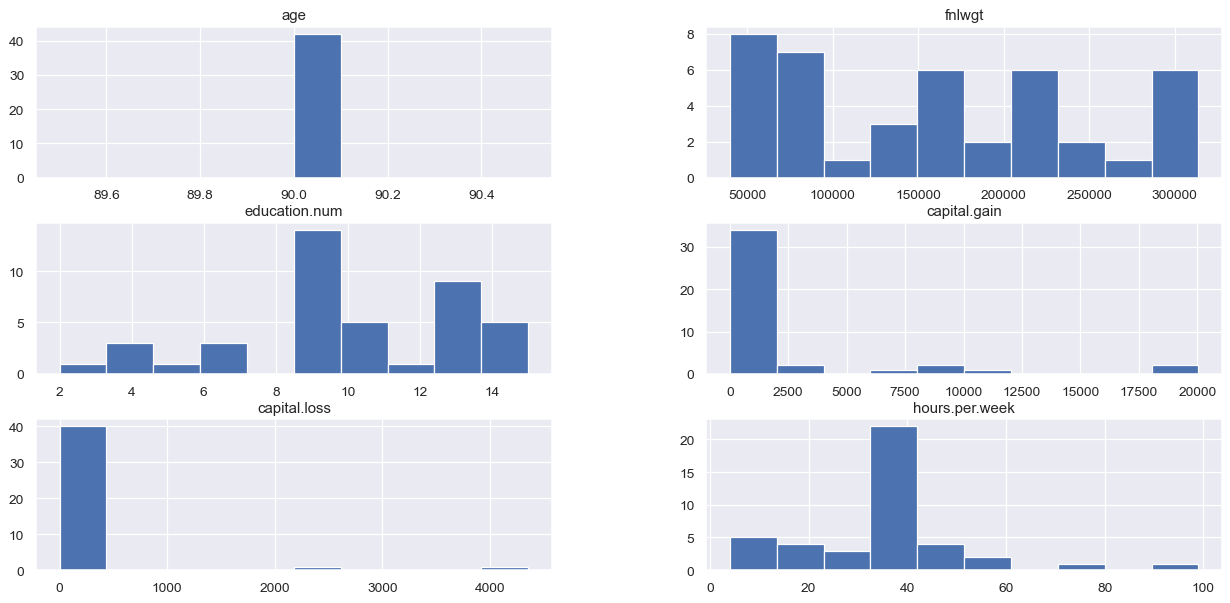

In [34]:
data[data['age'] == 90].hist(figsize = (17,8));

Feature Engineering

In [35]:
#martial status
data['marital.status']= data['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
data['marital.status']= data['marital.status'].replace(['Never-married'], 'not-married')
data['marital.status']= data['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [36]:
#martial status
data['marital.status']= data['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
data['marital.status']= data['marital.status'].replace(['Never-married'], 'not-married')
data['marital.status']= data['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [37]:
le = preprocessing.LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['income'] = le.fit_transform(data['income'])

In [38]:
data = data.drop('age',axis=1)

In [39]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [40]:
categorical_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'native.country', 'age_Groups'],
      dtype='object')

In [41]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]                   
                col_corr.add(colname)
    return col_corr

In [42]:
# Perform one-hot encoding on the categorical columns
data = pd.get_dummies(data, columns=categorical_cols)
data

,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,age_Groups_17-30 years old,age_Groups_31-40 years old,age_Groups_41-50 years old,age_Groups_51-61 years old,age_Groups_61+ years old
0,77053,9,0,0,4356,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,132870,9,0,0,4356,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,186061,10,0,0,4356,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,140359,4,0,0,3900,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,264663,10,0,0,3900,40,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,310152,10,1,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
32557,257302,12,0,0,0,38,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
32558,154374,9,1,0,0,40,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32559,151910,9,0,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [43]:
# Split the data into features and target
X = data.drop('income', axis=1)
y = data['income']

# Use SelectKBest to select the top 65 features based on f_regression scores
select = SelectKBest(score_func=f_regression, k=60)
select.fit(X, y)

# Get the selected features
selected_feature = X.columns[select.get_support()]

# Print the selected features
print(selected_feature)

X=data[selected_feature]


Index(['education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital.status_married',
       'marital.status_not-married', 'marital.status_other',
       'occupation_Adm-clerical', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support'

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=42)
print("x train ", x_train.shape)
print("y train ", y_train.shape)
print("x test ", x_test.shape)
print("y test ", y_test.shape)

x train  (26029, 60)
y train  (26029,)
x test  (6508, 60)
y test  (6508,)


Logistic Regression


In [86]:
model1 = LogisticRegression().fit(x_train, y_train)

y_predict=model1.predict(x_test)
print("Logistic Regression Score : ",model1.score(x_test, y_test))

Logistic Regression Score :  0.8495697602950215


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

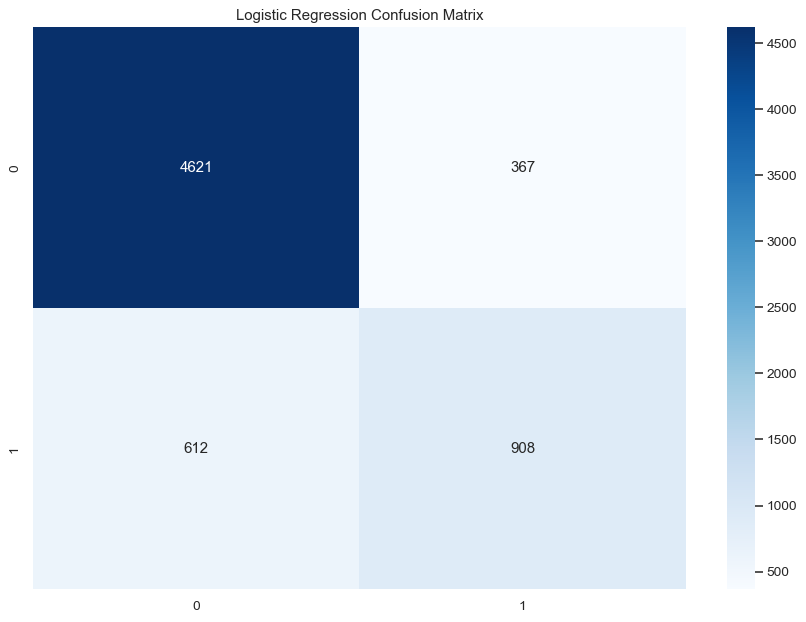

In [87]:
cf=confusion_matrix(y_test, y_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
sns.heatmap(confusion_matrix(y_test, y_predict),cmap='Blues', annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")

In [88]:
print('Accuracy on test:', accuracy_score(y_test,y_predict),"\n")
print('F1 score on test:', f1_score(y_test,y_predict),"\n")
precision=(TP/(TP+FP))
print("Precision :" , precision,"\n")
specificity=TN/(TN+FP)
print("Specificity :" , specificity,"\n")
recall=TP/(TP+FN)
print("Recall :" , recall,"\n")

Accuracy on test: 0.8495697602950215 

F1 score on test: 0.649731663685152 

Precision : 0.712156862745098 

Specificity : 0.9264234161988774 

Recall : 0.5973684210526315 



In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4988
           1       0.71      0.60      0.65      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.76      0.78      6508
weighted avg       0.84      0.85      0.84      6508



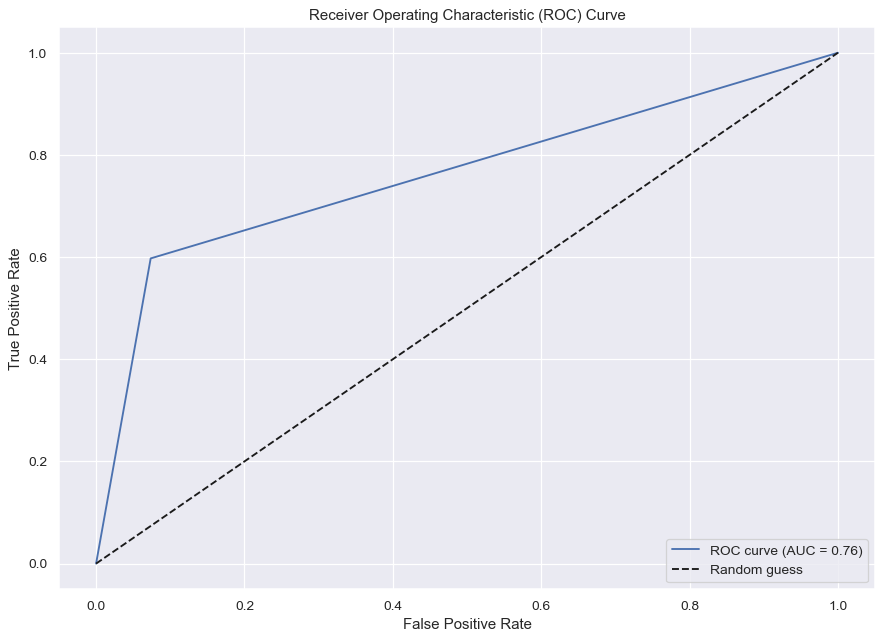

In [50]:

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_predict)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
yhat_prob = model1.predict_proba(x_test)
yhat_prob[0:100]

array([[5.12267897e-01, 4.87732103e-01],
       [9.96416641e-01, 3.58335876e-03],
       [5.73674612e-01, 4.26325388e-01],
       [8.48519380e-02, 9.15148062e-01],
       [2.52913248e-01, 7.47086752e-01],
       [9.53632761e-01, 4.63672390e-02],
       [9.49865322e-01, 5.01346776e-02],
       [8.90867574e-01, 1.09132426e-01],
       [9.44709341e-01, 5.52906592e-02],
       [9.55864662e-01, 4.41353382e-02],
       [8.73423631e-01, 1.26576369e-01],
       [9.75201264e-01, 2.47987358e-02],
       [3.02150758e-01, 6.97849242e-01],
       [9.96430090e-01, 3.56991015e-03],
       [8.07559242e-01, 1.92440758e-01],
       [9.94033402e-01, 5.96659753e-03],
       [7.97216209e-01, 2.02783791e-01],
       [9.89298793e-01, 1.07012071e-02],
       [7.60600922e-01, 2.39399078e-01],
       [9.94174679e-01, 5.82532104e-03],
       [8.41375829e-01, 1.58624171e-01],
       [8.14651606e-01, 1.85348394e-01],
       [9.80324142e-01, 1.96758575e-02],
       [9.67844995e-01, 3.21550049e-02],
       [8.113472

In [52]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [53]:
# Putting independent variables/features to X
X = data.drop('income',axis=1)

# Putting response/dependent variable/feature to y
y = data['income']

In [54]:
X.head()

,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,age_Groups_17-30 years old,age_Groups_31-40 years old,age_Groups_41-50 years old,age_Groups_51-61 years old,age_Groups_61+ years old
0,77053,9,0,0,4356,40,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,132870,9,0,0,4356,18,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,186061,10,0,0,4356,40,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,140359,4,0,0,3900,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,264663,10,0,0,3900,40,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [56]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default=DecisionTreeClassifier(max_depth=5)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [57]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(x_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4988
           1       0.77      0.53      0.63      1520

    accuracy                           0.85      6508
   macro avg       0.82      0.74      0.77      6508
weighted avg       0.85      0.85      0.84      6508



In [58]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4747  241]
 [ 713  807]]
0.8534111862323295


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

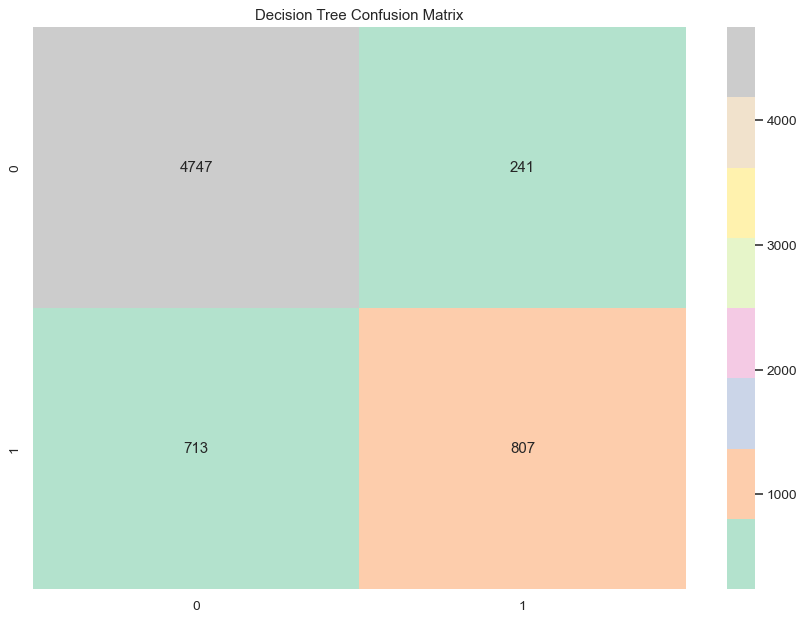

In [91]:
cf=confusion_matrix(y_test, y_pred_default)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
sns.heatmap(confusion_matrix(y_test, y_pred_default),cmap='Pastel2', annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")

In [60]:
print('Accuracy on test:', accuracy_score(y_test,y_pred_default),"\n")
print('F1 score on test:', f1_score(y_test,y_pred_default),"\n")
precision=(TP/(TP+FP))
print("Precision :" , precision,"\n")
specificity=TN/(TN+FP)
print("Specificity :" , specificity,"\n")
recall=TP/(TP+FN)
print("Recall :" , recall,"\n")

Accuracy on test: 0.8534111862323295 

F1 score on test: 0.6285046728971964 

Precision : 0.7700381679389313 

Specificity : 0.9516840417000801 

Recall : 0.530921052631579 



In [61]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [62]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021324,0.004418,0.001573,0.000470,1,{'max_depth': 1},0.757203,0.757203,0.757203,0.757203,0.757349,0.757232,0.000058,39
1,0.028319,0.003182,0.001796,0.000746,2,{'max_depth': 2},0.825970,0.825586,0.832309,0.824625,0.827858,0.827270,0.002730,38
2,0.034202,0.001806,0.001989,0.000622,3,{'max_depth': 3},0.841721,0.842105,0.844987,0.839800,0.842843,0.842291,0.001681,13
3,0.041090,0.001162,0.002000,0.000630,4,{'max_depth': 4},0.841721,0.841913,0.844987,0.839992,0.842843,0.842291,0.001632,13
4,0.053080,0.010671,0.002210,0.000755,5,{'max_depth': 5},0.850173,0.848444,0.851133,0.850557,0.853026,0.850667,0.001482,8


In [63]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [64]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117800,0.018919,0.002394,0.000489,5,{'min_samples_leaf': 5},0.848828,0.850173,0.852094,0.851517,0.840538,0.848630,0.004201,10
1,0.108003,0.030138,0.002194,0.000398,25,{'min_samples_leaf': 25},0.852862,0.857856,0.854399,0.858625,0.852450,0.855238,0.002548,2
2,0.086795,0.004625,0.002194,0.000399,45,{'min_samples_leaf': 45},0.853054,0.855743,0.852862,0.861698,0.858021,0.856276,0.003309,1
3,0.088695,0.010451,0.002592,0.000487,65,{'min_samples_leaf': 65},0.854591,0.851902,0.851325,0.857472,0.851681,0.853394,0.002345,5
4,0.086063,0.013381,0.002200,0.000396,85,{'min_samples_leaf': 85},0.851902,0.850557,0.852286,0.858433,0.849568,0.852549,0.003097,8


In [65]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [66]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106546,0.002952,0.002992,0.001093,5,{'min_samples_split': 5},0.844026,0.838840,0.841145,0.833846,0.830355,0.837642,0.004939,10
1,0.121576,0.027151,0.002198,0.000404,25,{'min_samples_split': 25},0.854591,0.850557,0.847868,0.854783,0.842651,0.850090,0.004534,9
2,0.102760,0.005179,0.001989,0.000012,45,{'min_samples_split': 45},0.852478,0.852094,0.852286,0.851325,0.847646,0.851166,0.001803,8
3,0.108947,0.013541,0.001992,0.000012,65,{'min_samples_split': 65},0.853054,0.853054,0.856704,0.857472,0.853218,0.854700,0.001965,7
4,0.114576,0.014520,0.002593,0.000797,85,{'min_samples_split': 85},0.852862,0.857664,0.857280,0.860930,0.854563,0.856660,0.002773,5


In [67]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051478,0.005952,0.002454,0.000570,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.843834,0.849020,0.844218,0.850941,0.846302,0.846863,0.002748,13
1,0.050300,0.003523,0.001394,0.000488,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.843834,0.849020,0.844218,0.850941,0.846302,0.846863,0.002748,13
2,0.052483,0.007518,0.002188,0.000405,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.843834,0.849020,0.844218,0.850941,0.846302,0.846863,0.002748,13
3,0.048061,0.002391,0.001796,0.000399,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.843834,0.849020,0.844218,0.850941,0.846302,0.846863,0.002748,13
4,0.077398,0.008518,0.002193,0.000399,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856896,0.854015,0.854207,0.856320,0.854371,0.855162,0.001200,3


In [69]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8558530447577113
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [70]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [71]:
# accuracy score
clf_gini.score(x_test,y_test)

0.8570989551321451

In [72]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(x_train, y_train)

# score
print(clf_gini.score(x_test,y_test))

0.8488014751075599


In [73]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4988
           1       0.76      0.52      0.62      1520

    accuracy                           0.85      6508
   macro avg       0.81      0.73      0.76      6508
weighted avg       0.84      0.85      0.84      6508



In [74]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[4736  252]
 [ 732  788]]


In [75]:
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Neural network model

In [82]:
# model
inputs = tf.keras.Input(shape=(60,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy') ]

model.compile(optimizer = optimizer,  loss='binary_crossentropy', metrics= metrics )

# fit model 
history = model.fit( x_train, y_train, epochs=20)
# evaluate model
y_predict = model.evaluate(x_test, y_test)

Epoch 1/20
814/814 [==============================] - 2s 1ms/step - loss: 0.3777 - accuracy: 0.8252
Epoch 2/20
814/814 [==============================] - 1s 1ms/step - loss: 0.3342 - accuracy: 0.8453
Epoch 3/20
814/814 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8495
Epoch 4/20
814/814 [==============================] - 1s 1ms/step - loss: 0.3199 - accuracy: 0.8514
Epoch 5/20
814/814 [==============================] - 1s 964us/step - loss: 0.3157 - accuracy: 0.8535
Epoch 6/20
814/814 [==============================] - 1s 1ms/step - loss: 0.3131 - accuracy: 0.8536
Epoch 7/20
814/814 [==============================] - 1s 1ms/step - loss: 0.3109 - accuracy: 0.8549
Epoch 8/20
814/814 [==============================] - 1s 951us/step - loss: 0.3093 - accuracy: 0.8552
Epoch 9/20
814/814 [==============================] - 1s 987us/step - loss: 0.3086 - accuracy: 0.8556
Epoch 10/20
814/814 [==============================] - 1s 941us/step - loss: 0.3076 - accuracy

204/204 [==============================] - 0s 965us/step


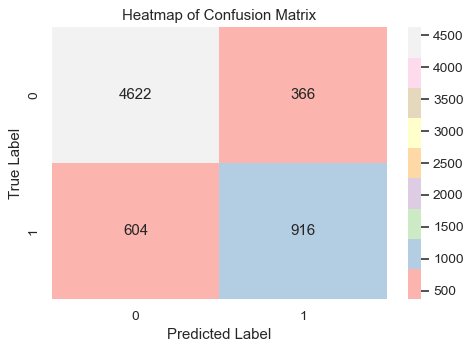

In [92]:
y_predN = np.round(model.predict(x_test))
cm_N=confusion_matrix(y_test, y_predN )
fig = plt.figure(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm_N, annot=True, fmt="d", cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [78]:
# evaluate model
model.evaluate(x_test, y_test)

204/204 [==============================] - 0s 756us/step - loss: 0.3235 - accuracy: 0.8470


[0.3234981894493103, 0.8469575643539429]

In [84]:
print('Accuracy on test:', accuracy_score(y_test,y_predN),"\n")
print('F1 score on test:', f1_score(y_test,y_predN),"\n")
precision=(TP/(TP+FP))
print("Precision :" , precision,"\n")
specificity=TN/(TN+FP)
print("Specificity :" , specificity,"\n")
recall=TP/(TP+FN)
print("Recall :" , recall,"\n")

Accuracy on test: 0.8509526736324524 

F1 score on test: 0.6538187009279086 

Precision : 0.7700381679389313 

Specificity : 0.9516840417000801 

Recall : 0.530921052631579 

